In [1]:
import os
os.getcwd()

'C:\\Users\\Emma\\Desktop\\python_projects\\pah-coastal-monitoring\\notebooks'

# Coastal PAH Contamination in French Marine Sediments

This notebook performs the analytical phase of the project:
- Focus on Benzo[a]pyrene (PAH)
- Sediment samples only
- Dry matter–normalized concentrations (µg/kg DW)

The goal is to identify concentration distributions, extreme values, and spatial patterns relevant to industrial and offshore environmental monitoring.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

sns.set_style("whitegrid")

In [4]:
import os

os.listdir("../data/processed")


['.ipynb_checkpoints', 'pah_sediment_ugkg_dw.csv']

In [5]:
df = pd.read_csv("../data/processed/pah_sediment_ugkg_dw.csv")
df.shape


(540, 63)

## Distribution of Benzo[a]pyrene concentrations in sediments


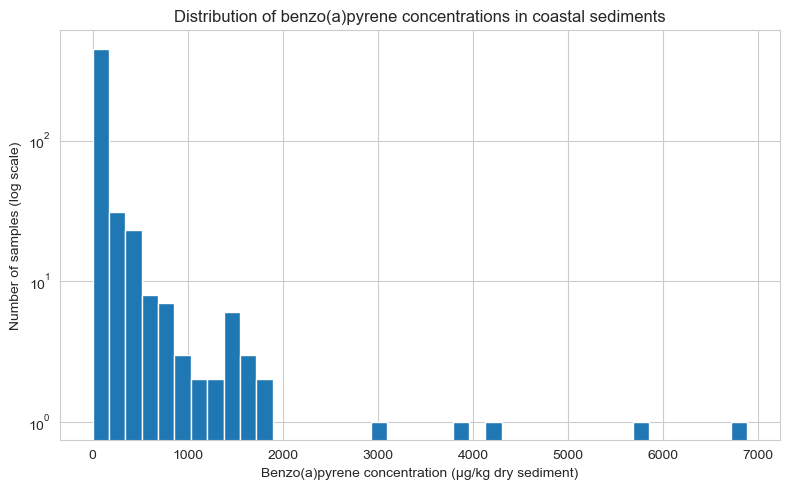

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    df["result_ug_per_kg_dw"],
    bins=40,
    log=True
)

ax.set_xlabel("Benzo(a)pyrene concentration (µg/kg dry sediment)")
ax.set_ylabel("Number of samples (log scale)")
ax.set_title("Distribution of benzo(a)pyrene concentrations in coastal sediments")

plt.tight_layout()

# save the figure
fig_path = "figures/figure_1_pah_sediment_distribution.png"
plt.savefig(fig_path, dpi=300)

plt.show()

Benzo(a)pyrene concentrations in coastal sediments show a highly skewed distribution, with most samples at low levels and a small number of extreme values indicative of localized contamination.

In [9]:
df_plot = df[
    (df["result_ug_per_kg_dw"] > 0) &
    (df["latitude"].notna()) &
    (df["longitude"].notna())
].copy()

df_plot.shape

(540, 63)

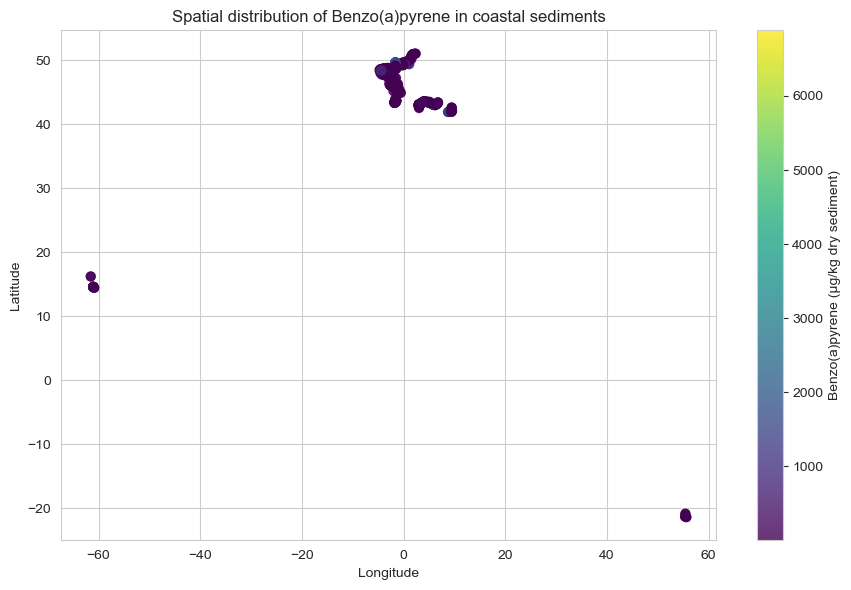

In [10]:
plt.figure(figsize=(9, 6))

sc = plt.scatter(
    df_plot["longitude"],
    df_plot["latitude"],
    c=df_plot["result_ug_per_kg_dw"],
    cmap="viridis",
    s=40,
    alpha=0.8
)

plt.colorbar(
    sc,
    label="Benzo(a)pyrene (µg/kg dry sediment)"
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial distribution of Benzo(a)pyrene in coastal sediments")

plt.tight_layout()
plt.show()

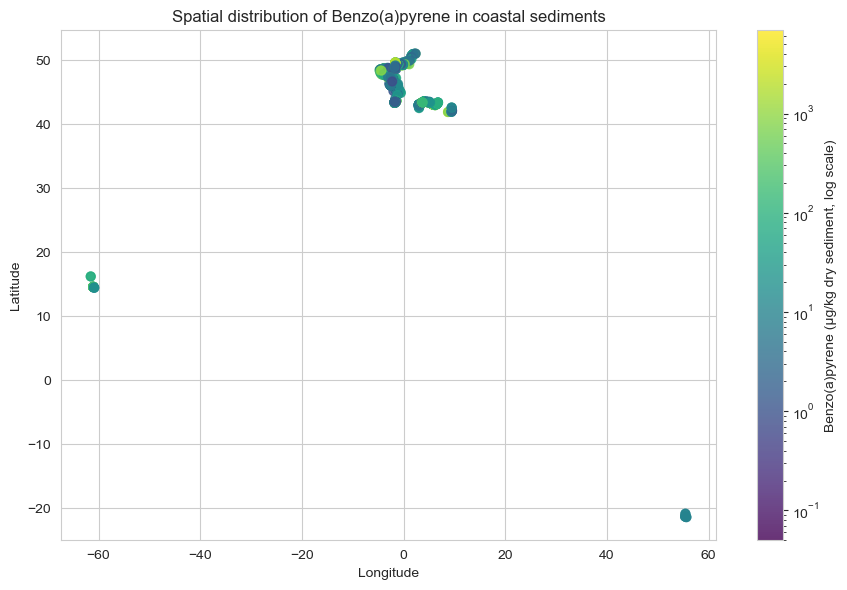

In [11]:
import matplotlib.colors as colors

plt.figure(figsize=(9, 6))

sc = plt.scatter(
    df_plot["longitude"],
    df_plot["latitude"],
    c=df_plot["result_ug_per_kg_dw"],
    cmap="viridis",
    norm=colors.LogNorm(),
    s=40,
    alpha=0.8
)

plt.colorbar(
    sc,
    label="Benzo(a)pyrene (µg/kg dry sediment, log scale)"
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial distribution of Benzo(a)pyrene in coastal sediments")

plt.tight_layout()
plt.show()


In [12]:
df_mainland = df_plot[
    (df_plot["latitude"].between(41, 52)) &
    (df_plot["longitude"].between(-5, 9))
].copy()

df_mainland.shape


(504, 63)

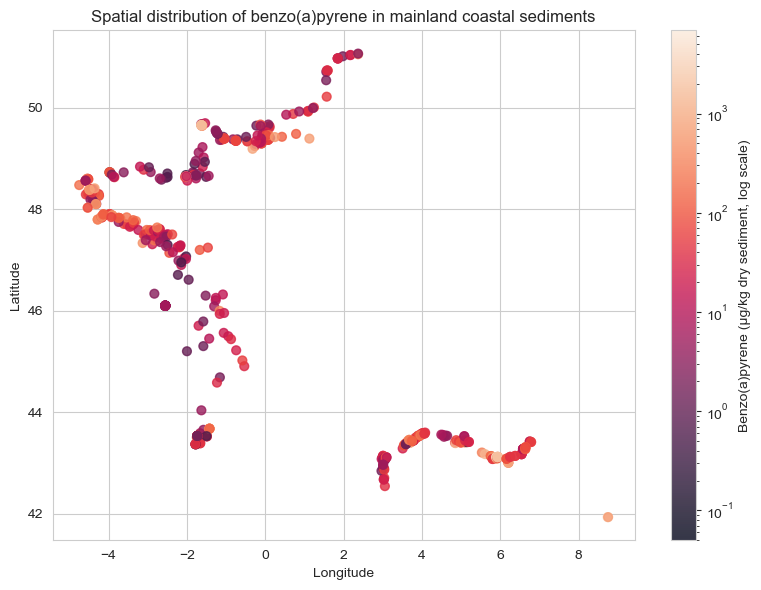

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

sc = ax.scatter(
    df_mainland["longitude"],
    df_mainland["latitude"],
    c=df_mainland["result_ug_per_kg_dw"],
    norm=plt.matplotlib.colors.LogNorm(),
    s=40,
    alpha=0.8
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Spatial distribution of benzo(a)pyrene in mainland coastal sediments")

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Benzo(a)pyrene (µg/kg dry sediment, log scale)")

plt.tight_layout()
plt.show()


In [14]:
df_mainland["result_ug_per_kg_dw"].describe()


count     504.000000
mean      179.519196
std       556.135918
min         0.050000
25%         7.847500
50%        40.000000
75%       104.250000
max      6885.400000
Name: result_ug_per_kg_dw, dtype: float64

In [15]:
df_mainland["result_ug_per_kg_dw"].quantile(
    [0.5, 0.75, 0.9, 0.95, 0.99]
)


0.50      40.00
0.75     104.25
0.90     397.60
0.95     792.75
0.99    1889.61
Name: result_ug_per_kg_dw, dtype: float64

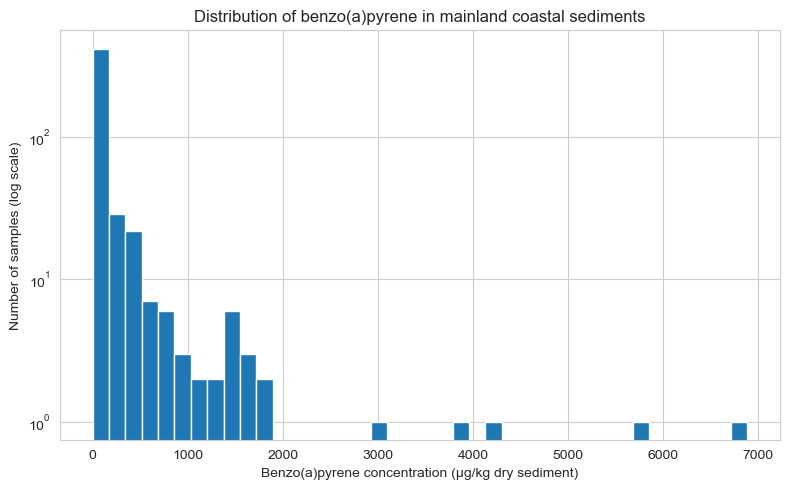

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(
    df_mainland["result_ug_per_kg_dw"],
    bins=40,
    log=True
)

ax.set_xlabel("Benzo(a)pyrene concentration (µg/kg dry sediment)")
ax.set_ylabel("Number of samples (log scale)")
ax.set_title("Distribution of benzo(a)pyrene in mainland coastal sediments")

plt.tight_layout()
plt.show()


In [17]:
df_sediment_only = pd.read_csv(
    "../data/processed/pah_sediment_ugkg_dw.csv"
)

df_sediment_only.shape


(540, 63)

In [35]:
import pandas as pd

df = pd.read_csv("../data/processed/pah_sediment_ugkg_dw.csv")
df.shape


(540, 63)

In [37]:
df_overseas = df[
    ~(
        df["latitude"].between(41, 52) &
        df["longitude"].between(-5, 9)
    )
].copy()

df_overseas.shape


(36, 63)

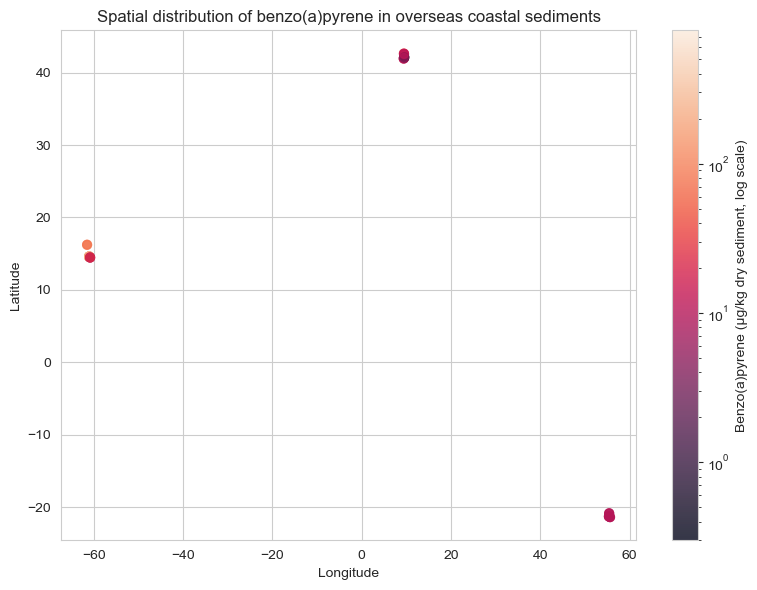

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(8, 6))

sc = ax.scatter(
    df_overseas["longitude"],
    df_overseas["latitude"],
    c=df_overseas["result_ug_per_kg_dw"],
    norm=LogNorm(),
    s=40,
    alpha=0.8
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Spatial distribution of benzo(a)pyrene in overseas coastal sediments")

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Benzo(a)pyrene (µg/kg dry sediment, log scale)")

plt.tight_layout()

# save figure
fig_path = "figures/figure_3_pah_overseas_spatial.png"
plt.savefig(fig_path, dpi=300)

plt.show()
